<a href="https://colab.research.google.com/github/hitomitsu50/SportsData_Portfolio/blob/main/2025%E5%B9%B4Statcast%E3%83%95%E3%82%A9%E3%83%BC%E3%82%B7%E3%83%BC%E3%83%A0_%E3%82%A2%E3%82%A6%E3%83%88%E7%8E%87TOP10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ライブラリーのインストール
!pip install pybaseball japanize_matplotlib
!sudo apt-get -y update
!sudo apt-get -y install fonts-ipaexfont

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 7s (17.9 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipaexfont is already the newest version (00401

In [ ]:
#ライブラリーのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import time
import glob
from pybaseball import statcast

In [ ]:
#データの読み込みと結合
#ファイル名パターンに一致するＣＳＶファイルを取得
csv_files_pattern=("sample_data/statcast_*.csv")
csv_files=glob.glob(csv_files_pattern)

In [ ]:
#ＣＳＶファイルの読み込みとリストの格納
dfs=[]
for file in csv_files:
  try:
    df_month=pd.read_csv(file)
    dfs.append(df_month)
    print(f"{file}を読み込みました。")
  except Exception as e:
    print(f"データの読み込み中にエラーが発生:{e}")


sample_data/statcast_2025-06-01-2025-06-30.csvを読み込みました。
sample_data/statcast_2025-03-18-2025-03-31.csvを読み込みました。
sample_data/statcast_2025-07-01-2025-07-31.csvを読み込みました。
sample_data/statcast_2025-05-01-2025-05-31.csvを読み込みました。
sample_data/statcast_2025-04-01-2025-04-30.csvを読み込みました。
sample_data/statcast_2025-09-01-2025-09-28.csvを読み込みました。
sample_data/statcast_2025-08-01-2025-08-31.csvを読み込みました。


In [ ]:
#データの結合
if dfs:
  df_combined=pd.concat(dfs,ignore_index=True)
  df=df_combined #dfへ格納
  print("全てのデータを結合しました。")
  display(df.head())
  print(f"結合後の行数:{len(df)}")
else:
  print("読み込めるデータがありません。")

全てのデータを結合しました。


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,SL,2025-06-30,87.9,2.95,6.34,"Banks, Tanner",630105,621383,field_out,hit_into_play,...,2.0,2.73,-0.56,-0.56,47.2,16.527261,-9.630745,36.373491,37.189388,35.693294
1,SI,2025-06-30,92.7,2.53,6.49,"Banks, Tanner",630105,621383,NaN,ball,...,2.0,2.00,1.18,1.18,47.4,NaN,NaN,NaN,NaN,NaN
2,FF,2025-06-30,93.2,2.59,6.47,"Banks, Tanner",593428,621383,single,hit_into_play,...,2.0,1.80,-0.09,0.09,49.3,4.244712,7.659826,31.567804,31.050805,25.892308
3,SL,2025-06-30,87.3,2.82,6.42,"Banks, Tanner",593428,621383,NaN,ball,...,2.0,2.66,-0.46,0.46,46.9,NaN,NaN,NaN,NaN,NaN
4,SL,2025-06-30,87.9,2.74,6.43,"Banks, Tanner",593428,621383,NaN,ball,...,2.0,2.47,-0.55,0.55,47.3,NaN,NaN,NaN,NaN,NaN


結合後の行数:742080


In [ ]:
#読み込まれた各ＣＳＶの行数を確認する
for file in csv_files:
  temp_df=pd.read_csv(file)
  print(f"{file}: {len(temp_df)}行")

sample_data/statcast_2025-06-01-2025-06-30.csv: 115816行
sample_data/statcast_2025-03-18-2025-03-31.csv: 49338行
sample_data/statcast_2025-07-01-2025-07-31.csv: 107305行
sample_data/statcast_2025-05-01-2025-05-31.csv: 120218行
sample_data/statcast_2025-04-01-2025-04-30.csv: 114767行
sample_data/statcast_2025-09-01-2025-09-28.csv: 110338行
sample_data/statcast_2025-08-01-2025-08-31.csv: 124298行


In [ ]:
# --- 1. フォーシーム(FF)かつ、打席結果が出たデータを抽出 ---
df_4seam_result=df[df["pitch_type"]=="FF"].copy()

# --- 2. １００球以上
# アウトの定義
out_events=["field_out","strikeout","force_out","grounded_into_double_play","fielders_choice"]

stats=df_4seam_result.groupby("player_name").agg(
    out_count=("events", lambda x: x.isin(out_events).sum()),
    total_results=("events","count")
).reset_index()

# 100球以上の定義
stats=stats[stats["total_results"]>=100].copy()

# アウト率の計算
stats["out_rate"]=stats["out_count"] / stats["total_results"]

/tmp/ipython-input-3781540833.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot=sns.barplot(data=top_10_out, x="out_rate",y="player_name",palette="magma")


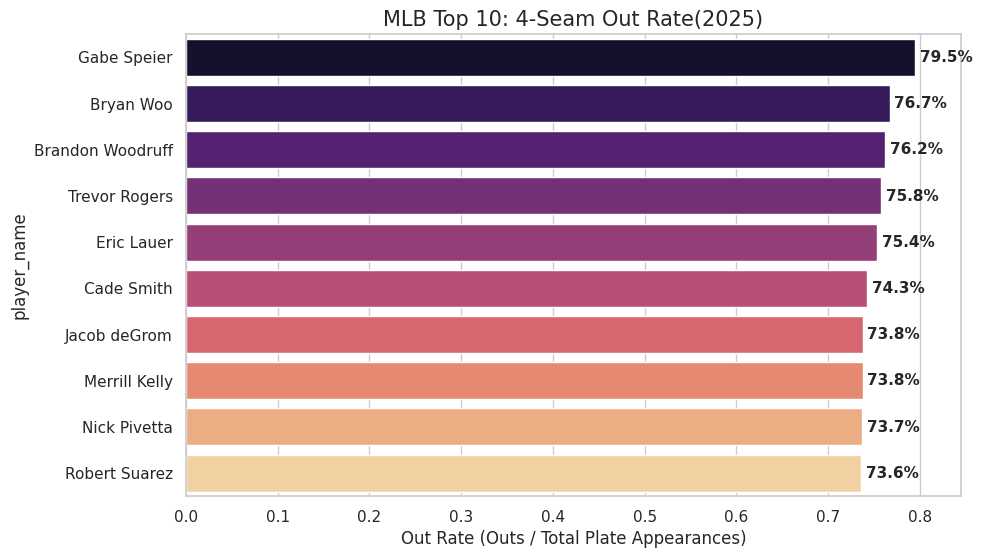

In [ ]:
# --- 3. 姓名 ---
def reformat_name(name):
  if "," in name:
    last,first=name.split(", ")
    return f"{first} {last}"
  return name

stats["player_name"]=stats["player_name"].apply(reformat_name)

# --- 4. 可視化 (アウト率ランキング TOP10) ---
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

#配色
top_10_out=stats.sort_values("out_rate",ascending=False).head(10)
plot=sns.barplot(data=top_10_out, x="out_rate",y="player_name",palette="magma")

#数値と単位(%)を右側に表示
for p in plot.patches:
  width=p.get_width()
  plot.text(width + 0.005, p.get_y() + p.get_height()/2, f"{width:.1%}",
            va="center",fontweight="bold",fontsize=11)

plt.title("MLB Top 10: 4-Seam Out Rate(2025)",fontsize=15)
plt.xlabel("Out Rate (Outs / Total Plate Appearances)")
plt.xlim(0, max(top_10_out["out_rate"])+0.05)
plt.show()

In [ ]:
# --- 5. テキスト出力 ---
print(f" --- 2025 MLB Four-Seam Anakysis: Top 10 Out Rate ---")
for index, row in top_10_out.iterrows():
  print(f"{row["player_name"]} {row["out_rate"]:.1%}")

 --- 2025 MLB Four-Seam Anakysis: Top 10 Out Rate ---
Gabe Speier 79.5%
Bryan Woo 76.7%
Brandon Woodruff 76.2%
Trevor Rogers 75.8%
Eric Lauer 75.4%
Cade Smith 74.3%
Jacob deGrom 73.8%
Merrill Kelly 73.8%
Nick Pivetta 73.7%
Robert Suarez 73.6%
